# Exploration and initial analyses

In [58]:
# Allow python to import modules from src folders
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("src/")

from preprocessing.load_dataset import *

## CMU dataset

We load the 4 `.tsv` and `.txt` files of the CMU dataset into 4 different dataframes

In [2]:
characters_df = load_characters_df()
movies_df = load_movies_df()
plot_df = load_plot_df()
tvtropes_df = load_tvtropes_df()

### Characters

In [3]:
characters_df.sample(5)

,wiki_movie_id,freebase_movie_id,release_date,character_name,actor_birth,actor_gender,actor_height,actor_ethnicity,actor_name,release_actor_age,freebase_map_id,freebase_character_id,freebase_actor_id
176440,6805971,/m/0gpv_7,1969,Barkis,1910-11-26,M,NaN,NaN,Cyril Cusack,58.0,/m/0b_hc2q,/m/0b_hc2t,/m/01w15n
237656,19858634,/m/05msm_d,NaN,NaN,NaN,M,NaN,NaN,Nikhil Dwivedi,NaN,/m/0gvxt28,NaN,/m/06znfn1
36904,30753936,/m/0gfdbjz,2011-08,NaN,1973-08-30,F,1.65,/m/0d2by,Lisa Ling,NaN,/m/0h1k_g4,NaN,/m/06dt5m
164427,1645634,/m/05k7_n,1978-03-13,NaN,1919-06-11,M,NaN,NaN,Richard Todd,58.0,/m/094rc2z,NaN,/m/0147bj
233824,4324255,/m/0bx4xs,1986-01-01,NaN,NaN,NaN,NaN,NaN,Myke R. Mueller,NaN,/m/0gc9b7s,NaN,/m/0gc9b7v


In [4]:
total_characters = len(characters_df)
print(f"Number of characters loaded: {total_characters}")
print(f"Number of unique movies: {len(characters_df['wiki_movie_id'].unique())}")
print(f"Number of unique actors: {len(characters_df['freebase_actor_id'].unique())}", end="\n\n")

print(f"Percentage of missing gender: {characters_df['actor_gender'].isna().sum()/total_characters*100:.2f}%")
print(f"Percentage of missing height: {characters_df['actor_height'].isna().sum()/total_characters*100:.2f}%")
print(f"Percentage of missing ethnicity: {characters_df['actor_ethnicity'].isna().sum()/total_characters*100:.2f}%")
print(f"Percentage of missing age upon release: {characters_df['release_actor_age'].isna().sum()/total_characters*100:.2f}%")

Number of characters loaded: 450669
Number of unique movies: 64330
Number of unique actors: 135761

Percentage of missing gender: 10.12%
Percentage of missing height: 65.65%
Percentage of missing ethnicity: 76.47%
Percentage of missing age upon release: 35.08%


In [5]:
print(f"Number of character records for which ethnicity is known: {len(characters_df[~characters_df['actor_ethnicity'].isna()])}")
print(f"Number of unique actors for which ethnicity is known: {len(characters_df[~characters_df['actor_ethnicity'].isna()]['freebase_actor_id'].unique())}")

Number of character records for which ethnicity is known: 106058
Number of unique actors for which ethnicity is known: 8151


### Movies

In [6]:
movies_df.sample(5)

,wiki_movie_id,freebase_movie_id,movie_name,movie_release_date,box_office,movie_runtime,movie_languages,movie_countries,movie_genres
39792,3880325,/m/0b4sr7,Father's Little Dividend,1951,3100000.0,82.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/02l7c8': 'Romance Film', '/m/01z4y': 'Com..."
61629,18702162,/m/04gr4dw,A Study in Scarlet,1933-05-14,NaN,77.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/02n4kr': 'Myster..."
5576,19853432,/m/04q7k8p,Kallukkul Eeram,NaN,NaN,NaN,{'/m/07c9s': 'Tamil Language'},{'/m/03rk0': 'India'},"{'/m/02hmvc': 'Short Film', '/m/02l7c8': 'Roma..."
21093,24567664,/m/080hmgr,Chestnut: Hero of Central Park,2004-10-21,NaN,83.0,{'/m/02h40lc': 'English Language'},{},"{'/m/0hqxf': 'Family Film', '/m/03k9fj': 'Adve..."
31523,29480472,/m/0ds1cwg,After the Waterfall,NaN,NaN,94.0,{},{'/m/0ctw_b': 'New Zealand'},{'/m/07s9rl0': 'Drama'}


In [38]:
total_movies = len(movies_df)
print(f"Number of movies loaded: {total_movies}")
print(f"Percentage of missing box office revenue: {movies_df['box_office'].isna().sum()/total_movies*100:.2f}%")

Number of movies loaded: 81741
Percentage of missing box office revenue: 89.72%


In [8]:
print(f"Number of movies for which we have matching character data: {len(movies_df.merge(characters_df, how='inner', on=['wiki_movie_id', 'freebase_movie_id'])['freebase_movie_id'].unique())}")

Number of movies for which we have matching character data: 64330


In [37]:
# Extract years from the release date of movies
movies_df['movie_release_year'] = movies_df[~movies_df['movie_release_date'].isna()]['movie_release_date'].astype(str).str[:4].astype(int)

# Fix data aberration
wrong_dates = movies_df[movies_df['movie_release_year'] < 1800].index

# A movie that has the release date 1010. We fix the typo to 2010
movies_df.loc[wrong_dates, 'movie_release_year']= 2010
movies_df.loc[wrong_dates, 'movie_release_date'] ='2010-12-02'

### Plot

In [9]:
plot_df.sample(5)

,wiki_movie_id,plot_summary
780,18964317,"Three individuals - Akshay , Mr. Joshi and La..."
21673,27482400,Patrick and his girlfriend Megan meet up with ...
22571,32839814,Two women and eight men are shipwrecked on a S...
11613,35013190,A blind violinist called Sibi has been singing...
10884,3624149,"In London, Julia Ross goes to a new employmen..."


In [10]:
total_plot = len(plot_df)
print(f"Number of plot summaries loaded: {total_plot}")

Number of plot summaries loaded: 42303


### Tropes

In [11]:
tvtropes_df.sample(5)

,trope_name,character_data
281,granola_person,"{'char': 'Ashley', 'movie': 'Orange County', '..."
187,ditz,"{'char': 'Henry Roth', 'movie': '50 First Date..."
166,cultured_badass,"{'char': 'Everett Hitch', 'movie': 'Appaloosa'..."
289,hardboiled_detective,"{'char': 'Sam Spade', 'movie': 'The Maltese Fa..."
279,granola_person,"{'char': 'Lotte Schwartz', 'movie': 'Being Joh..."


In [12]:
total_tropes = len(tvtropes_df)
print(f"Number of tropes loaded: {total_tropes}")

Number of tropes loaded: 501


## IMDB dataset

We load the 4 `.tsv` files of the IMDB dataset into 4 different dataframes

In [41]:
imdb_ratings_df = load_imdb_ratings()
imdb_title_df = load_imdb_title_basics()
imdb_principals_df = load_imdb_title_principals()
imdb_people_df = load_imdb_person_basics()

### Ratings

In [42]:
imdb_ratings_df.sample(5)

,tconst,averageRating,numVotes
765292,tt1655335,6.9,76
469538,tt10305486,1.6,6
1076842,tt4094966,7.7,86
800250,tt1807585,7.3,7
935561,tt2454342,8.5,7


We have 1367491 movies for which we have a rating.


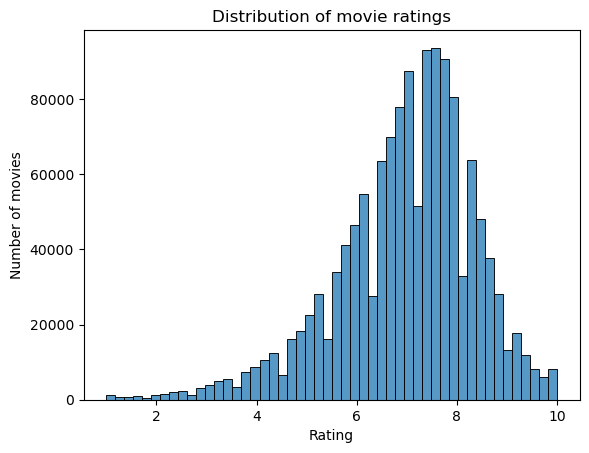

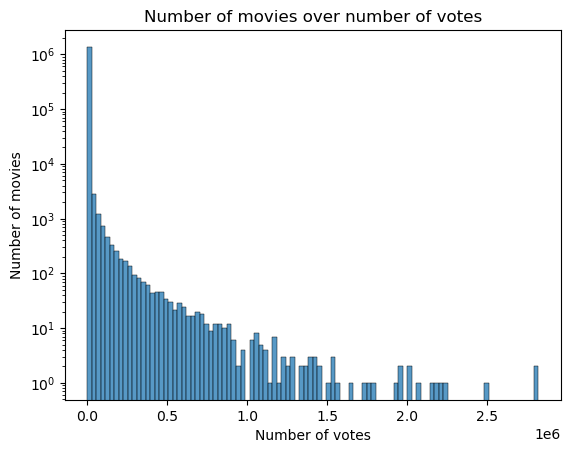

In [82]:
total_ratings = len(imdb_ratings_df)
print(f"We have {total_ratings} movies for which we have a rating.")

# Check the distribution of grades
sns.histplot(data=imdb_ratings_df, x="averageRating", bins=50)

plt.title("Distribution of movie ratings")
plt.xlabel("Rating")
plt.ylabel("Number of movies")
plt.show()

# Check the distribution of votes
sns.histplot(data=imdb_ratings_df, x="numVotes", bins=100)
plt.yscale("log")

plt.title("Number of movies over number of votes")
plt.xlabel("Number of votes")
plt.ylabel("Number of movies")
plt.show()

### Title

In [43]:
imdb_title_df.sample(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
2014393,tt11884530,movie,Ujudaejang aekkunun,Ujudaejang aekkunun,0,1980,\N,77,"Action,Adventure,Animation"
9093135,tt7282274,movie,The Execution of Love,Ai no shokei,0,1983,\N,\N,\N
8422174,tt5780570,movie,A Scandall,A Scandall,0,2016,\N,112,Thriller
8646179,tt6285944,movie,The Banker,The Banker,0,2020,\N,120,"Biography,Drama"
7507921,tt3714492,movie,Hello I Love You,Hello I Love You,0,2018,\N,100,"Comedy,Romance"


In [72]:
total_title = len(imdb_title_df)
print(f"We have {total_title} movie titles")

We have 662518 movie titles


### Principals

In [44]:
imdb_principals_df.sample(5)

,tconst,ordering,nconst,category,job,characters
45925522,tt4937702,5,nm1171817,composer,main title composer,\N
57400692,tt9372768,2,nm5380264,actress,\N,"[""Svetlana""]"
32354169,tt21637750,9,nm7263798,producer,producer,\N
38836183,tt27991635,2,nm0005039,actor,\N,\N
43377722,tt3811750,3,nm0249020,actor,\N,"[""Various Characters""]"


### People

In [45]:
imdb_people_df.sample(5)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
7251421,nm2997834,John Bautista,\N,\N,"actor,miscellaneous","tt0473485,tt1138475,tt3267392,tt5208584"
6071459,nm1665668,Gaby Gilles,\N,\N,actress,tt0413421
4470806,nm13759123,James Temperton,\N,\N,NaN,\N
1046167,nm10133647,Mellisa Stoll,\N,\N,miscellaneous,tt4622682
8788994,nm4748155,Olivier Demarest,\N,\N,"actor,editorial_department","tt1868747,tt1075113"


In [ ]:
# LUCA SEPARATOR

In [ ]:
print(movies_df.count())
print('==========')
print(imdb_title_df.count())

wiki_movie_id         74839
freebase_movie_id     74839
movie_name            74839
movie_release_date    74839
box_office             8328
movie_runtime         58631
movie_languages       74839
movie_countries       74839
movie_genres          74839
movie_release_year    74839
dtype: int64
tconst            661815
titleType         661815
primaryTitle      661815
originalTitle     661815
isAdult           661815
startYear         661815
endYear           661815
runtimeMinutes    661815
genres            661815
dtype: int64


In [35]:
# Extract the movies from the title.basics imbd dataset
imdb_title_df.sample(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
4052098,tt1565416,movie,Elias Petropoulos: An Underground World,Ilias Petropoulos: Enas kosmos ypogeios,0,2005,\N,61,"Biography,Documentary"
3019,tt0003048,movie,A Lady of Quality,A Lady of Quality,0,1913,\N,50,Drama
2256609,tt1232784,movie,Independents,Independents,0,2007,\N,77,Documentary
6067690,tt2419230,movie,Enkô kyôyô: Ochita hitozuma,Enkô kyôyô: Ochita hitozuma,0,2011,\N,60,\N
43311,tt0044087,movie,Sugarfoot,Sugarfoot,0,1951,\N,80,Western


In [ ]:
imdb_people_df.sample(5)

In [ ]:
imdb_principals_df.sample(5)

In [ ]:
# merge with ratings
imdb_ratings_meta = imdb_ratings_df.merge(imdb_title_df, on='tconst', how='inner')
imdb_ratings_meta.head()

## Merge the CMU dataset with the IMDB

We first import the translation dataframe, which includes both the IMDB id and the Freebase id, enabling us to combine the IMDB dataset with the CMU dataset.

In [5]:
translation_id = load_translation_df()
translation_id.columns

Index(['imdb_id', 'freebase_id'], dtype='object')

Then we merge the IMDB ratings with the CMU dataset

In [31]:
imdb_ratings_translated_df = imdb_ratings_df.merge(translation_id, how='inner', left_on='tconst', right_on='imdb_id')
merged_df = imdb_ratings_translated_df.merge(movies_df, how='inner', left_on='freebase_id', right_on='freebase_movie_id')

In [9]:
print(f"The merged dataframe contains {len(merged_df)} movies")

The merged dataframe contains 54832 movies


In [10]:
merged_df

,tconst,averageRating,numVotes,imdb_id,freebase_id,wiki_movie_id,freebase_movie_id,movie_name,movie_release_date,box_office,movie_runtime,movie_languages,movie_countries,movie_genres
0,tt0000001,5.7,2006,tt0000001,/m/0kvdsy,7669437,/m/0kvdsy,Carmencita,1894,NaN,0.500000,{'/m/06ppq': 'Silent film'},{'/m/09c7w0': 'United States of America'},"{'/m/02hmvc': 'Short Film', '/m/06ppq': 'Silen..."
1,tt0000002,5.8,269,tt0000002,/m/02pz844,9996498,/m/02pz844,Le Clown et ses chiens,1892-10-28,NaN,NaN,{'/m/06ppq': 'Silent film'},{'/m/0f8l9c': 'France'},"{'/m/02hmvc': 'Short Film', '/m/06ppq': 'Silen..."
2,tt0000003,6.5,1909,tt0000003,/m/0g53g2,6431647,/m/0g53g2,Pauvre Pierrot,1892-10-28,NaN,NaN,{'/m/06ppq': 'Silent film'},{'/m/0f8l9c': 'France'},"{'/m/02hmvc': 'Short Film', '/m/06ppq': 'Silen..."
3,tt0000004,5.5,178,tt0000004,/m/02pzdsc,9999926,/m/02pzdsc,Un bon bock,1892-10-28,NaN,NaN,{'/m/06ppq': 'Silent film'},{'/m/0f8l9c': 'France'},"{'/m/02hmvc': 'Short Film', '/m/06ppq': 'Silen..."
4,tt0000005,6.2,2689,tt0000005,/m/0jq3g,73372,/m/0jq3g,Blacksmith Scene,1893,NaN,0.566667,{'/m/06ppq': 'Silent film'},{'/m/09c7w0': 'United States of America'},"{'/m/02hmvc': 'Short Film', '/m/06ppq': 'Silen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54827,tt9244928,8.1,9,tt9244928,/m/02r1f94,11142347,/m/02r1f94,Unarchigal,1976,NaN,NaN,"{'/m/0999q': 'Malayalam Language', '/m/07c9s':...",{'/m/03rk0': 'India'},{'/m/07s9rl0': 'Drama'}
54828,tt9330112,7.2,90,tt9330112,/m/04mzlrp,19620290,/m/04mzlrp,Ninaithale Inikkum,2009-09-04,NaN,NaN,{'/m/07c9s': 'Tamil Language'},{'/m/03rk0': 'India'},"{'/m/02n4kr': 'Mystery', '/m/07s9rl0': 'Drama'}"
54829,tt9401672,6.3,9,tt9401672,/m/04184zz,17093635,/m/04184zz,Criminals Gone Wild,NaN,NaN,77.000000,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/0hj3n07': 'Culture & Society', '/m/0hj3n9..."
54830,tt9619962,3.5,11,tt9619962,/m/02qr6_8,10826173,/m/02qr6_8,Hi-Tops,NaN,NaN,88.000000,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/04p5fxn': 'Christian film', '/m/04t36': '..."


## Load personas

In [15]:
personas_df = load_personas()

In [16]:
personas_df

,freebase_id,movie_name,secondary_name,full_name,token_occurences,estimated_trope,trope_distrib
0,e7,The Trap,she,her,5,1,"[0.0, 0.63265, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
1,e8,The Trap,she,her,5,1,"[0.0, 0.77551, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
2,e12,The Trap,he,his,7,19,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,e19,The Trap,she,her,6,1,"[0.0, 0.67347, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
4,e4,The Trap,Eve,Eve,11,23,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
178729,e11,Una Aventura Llamada Menudo,Concepci,Danny Concepci,3,1,"[0.0, 0.22449, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
178730,e10,Una Aventura Llamada Menudo,he,the son of C sar Concepci n Jr.,4,44,"[0.0, 0.02041, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
178731,e1,Una Aventura Llamada Menudo,they,their,6,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
178732,e0,Plaza de Almas,he,his,6,1,"[0.0, 0.46939, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."


In [17]:
personas_df.sample(5)

,freebase_id,movie_name,secondary_name,full_name,token_occurences,estimated_trope,trope_distrib
150197,e25,Noo Hin: The Movie,sister,the sisters,4,31,"[0.0, 0.0, 0.0, 0.06122, 0.0, 0.0, 0.0, 0.0, 0..."
129742,e10,Buzz Lightyear of Star Command: The Adventure ...,Zurg,Zurg,25,40,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
38218,e0,Courage of Lassie,she,his mother,4,1,"[0.0, 0.91837, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
103465,e1,Bala Mitrula Katha,Dharma,Dharma,4,17,"[0.0, 0.0, 0.02041, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
12925,e1,The Blood Spattered Bride,she,her,5,34,"[0.0, 0.02041, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."


### testing tropes json file

In [24]:
import json
from collections import defaultdict
import ast
import matplotlib.pyplot as plt


In [13]:
file_path = './trope2characters.json'  # download link https://www.dropbox.com/s/wxqxhwcokojetqy/trope2characters.json?dl=0

with open(file_path, 'r') as file:
    trope2characters_data = json.load(file)

list(trope2characters_data.items())[:5]

[('chanteuse',
  ['{"char": "Jessica Rabbit", "movie": "Who Framed Roger Rabbit", "id": "/m/02wszk9", "actor": "Kathleen Turner"}\n',
   '{"char": "Tina Carlyle", "movie": "The Mask", "id": "/m/0k5wls", "actor": "Cameron Diaz"}\n',
   '{"char": "Susie Diamond", "movie": "The Fabulous Baker Boys", "id": "/m/0k50tl", "actor": "Michelle Pfeiffer"}\n',
   '{"char": "Sugar Kane Kowalczyk", "movie": "Some Like It Hot", "id": "/m/0k3j8v", "actor": "Marilyn Monroe"}\n',
   '{"char": "Dorothy Vallens", "movie": "Blue Velvet", "id": "/m/0jvlc4", "actor": "Isabella Rossellini"}\n',
   '{"char": "Ellen Aim", "movie": "Streets of Fire", "id": "/m/0k3w12", "actor": "Diane Lane"}\n']),
 ('doormat',
  ['{"char": "George McFly", "movie": "Back to the Future", "id": "/m/0jty5w", "actor": "Crispin Glover"}\n',
   '{"char": "Harry Dunne", "movie": "Dumb & Dumber", "id": "/m/0jxmxp", "actor": "Jeff Daniels"}\n',
   '{"char": "Belle", "movie": "Beauty and the Beast: The Enchanted Christmas", "id": "/m/0fprk

In [14]:
movie_ids = []
# Create a dictionary to map actors to their roles and associated tropes
actor_roles = defaultdict(lambda: defaultdict(list))

# Process each trope and associated characters
for trope, characters in trope2characters_data.items():
    for char_info in characters:
        char_dict = ast.literal_eval(char_info.strip())
        movie_id = char_dict["id"]
        actor = char_dict["actor"]
        movie = char_dict["movie"]
        character = char_dict["char"]

        actor_roles[actor][trope].append((character, movie))

        movie_ids.append({"id": movie_id, "trope": trope, "actor": actor, "character": character, "movie_name": movie})


trope_df = pd.DataFrame(movie_ids)

In [15]:
trope_df.head(5)

,id,trope,actor,character,movie_name
0,/m/02wszk9,chanteuse,Kathleen Turner,Jessica Rabbit,Who Framed Roger Rabbit
1,/m/0k5wls,chanteuse,Cameron Diaz,Tina Carlyle,The Mask
2,/m/0k50tl,chanteuse,Michelle Pfeiffer,Susie Diamond,The Fabulous Baker Boys
3,/m/0k3j8v,chanteuse,Marilyn Monroe,Sugar Kane Kowalczyk,Some Like It Hot
4,/m/0jvlc4,chanteuse,Isabella Rossellini,Dorothy Vallens,Blue Velvet


<Figure size 1000x800 with 0 Axes>

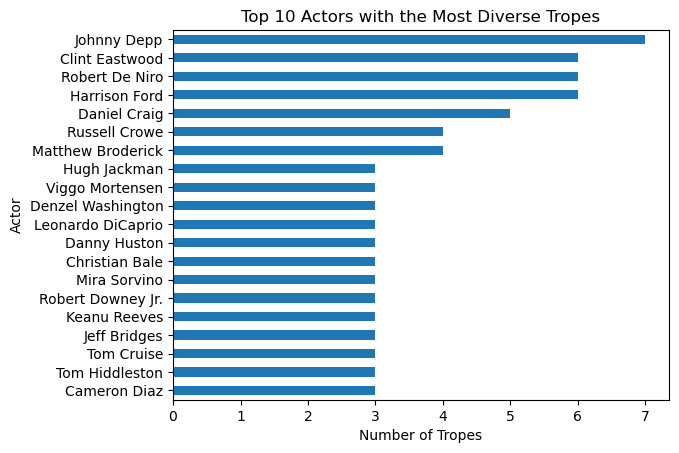

In [27]:
# Count the number of different tropes associated with each actor
actor_trope_count = {actor: len(tropes) for actor, tropes in actor_roles.items()}
actor_trope_count_df = pd.DataFrame(list(actor_trope_count.items()), columns=['Actor', 'Trope Count'])

actor_trope_count_df_sorted = actor_trope_count_df.sort_values(by='Trope Count', ascending=True)

# bar plot for the top 20 actors with the most tropes
plt.figure(figsize=(10, 8))
actor_trope_count_df_sorted.tail(20).plot(kind='barh', x='Actor', y='Trope Count', legend=False)
plt.xlabel('Number of Tropes')
plt.ylabel('Actor')
plt.title('Top 10 Actors with the Most Diverse Tropes')
plt.show()

In [32]:
merged_df['movie_name_standardized'] = merged_df['movie_name'].str.lower()
trope_df['movie_name_standardized'] = trope_df['movie_name'].str.lower()

# Simple merge the trope and movie dataframes based on movie names
all_df = pd.merge( merged_df, trope_df, on='movie_name_standardized', how='inner')
all_df.head(10)

,tconst,averageRating,numVotes,imdb_id,freebase_id,wiki_movie_id,freebase_movie_id,movie_name_x,movie_release_date,box_office,movie_runtime,movie_languages,movie_countries,movie_genres,movie_name_standardized,id,trope,actor,character,movie_name_y
0,tt0000420,6.2,2803,tt0000420,/m/085bgh,2828945,/m/085bgh,Alice in Wonderland,1903-05,NaN,10.0,{},{'/m/07ssc': 'United Kingdom'},"{'/m/02hmvc': 'Short Film', '/m/06ppq': 'Silen...",alice in wonderland,/m/04q4dng,broken_bird,Johnny Depp,Mad Hatter,Alice in Wonderland
1,tt0004873,6.1,637,tt0004873,/m/06zr25h,23669602,/m/06zr25h,Alice in Wonderland,1915-01-19,NaN,52.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/06ppq': 'Silent film', '/m/01g6gs': 'Blac...",alice in wonderland,/m/04q4dng,broken_bird,Johnny Depp,Mad Hatter,Alice in Wonderland
2,tt0021599,4.3,189,tt0021599,/m/09rvr2z,25588092,/m/09rvr2z,Alice in Wonderland,1931-09-30,NaN,58.0,{},{'/m/09c7w0': 'United States of America'},{'/m/01hmnh': 'Fantasy'},alice in wonderland,/m/04q4dng,broken_bird,Johnny Depp,Mad Hatter,Alice in Wonderland
3,tt0023753,6.3,2529,tt0023753,/m/0gtkg,62180,/m/0gtkg,Alice in Wonderland,1933-12-22,NaN,76.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/01hmnh': 'Fantasy', '/m/01g6gs': 'Black-a...",alice in wonderland,/m/04q4dng,broken_bird,Johnny Depp,Mad Hatter,Alice in Wonderland
4,tt0042189,6.2,855,tt0042189,/m/063_py3,22966826,/m/063_py3,Alice in Wonderland,1950,NaN,83.0,{},{'/m/09c7w0': 'United States of America'},"{'/m/07s9rl0': 'Drama', '/m/0hqxf': 'Family Fi...",alice in wonderland,/m/04q4dng,broken_bird,Johnny Depp,Mad Hatter,Alice in Wonderland
5,tt0043274,7.3,150477,tt0043274,/m/039zft,769066,/m/039zft,Alice in Wonderland,1951-07-26,NaN,75.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/03k9fj': 'Adventure', '/m/04xvh5': 'Costu...",alice in wonderland,/m/04q4dng,broken_bird,Johnny Depp,Mad Hatter,Alice in Wonderland
6,tt0060089,6.8,916,tt0060089,/m/03p86z,912670,/m/03p86z,Alice in Wonderland,1966,NaN,72.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{'/m/0hqxf': 'Family Film', '/m/01hmnh': 'Fant...",alice in wonderland,/m/04q4dng,broken_bird,Johnny Depp,Mad Hatter,Alice in Wonderland
7,tt0074113,6.2,3119,tt0074113,/m/06wbq4,2212695,/m/06wbq4,Alice in Wonderland,1976-12-10,90000000.0,81.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/04t36': 'Musical', '/m/01z4y': 'Comedy', ...",alice in wonderland,/m/04q4dng,broken_bird,Johnny Depp,Mad Hatter,Alice in Wonderland
8,tt0083536,6.5,174,tt0083536,/m/0dgqblh,28948624,/m/0dgqblh,Alice in Wonderland,1983,NaN,90.0,{'/m/02h40lc': 'English Language'},{},"{'/m/0hqxf': 'Family Film', '/m/03k9fj': 'Adve...",alice in wonderland,/m/04q4dng,broken_bird,Johnny Depp,Mad Hatter,Alice in Wonderland
9,tt0088693,7.2,3254,tt0088693,/m/01f39b,212265,/m/01f39b,Alice in Wonderland,1985-12-09,NaN,192.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{'/m/0hqxf': 'Family Film', '/m/01hmnh': 'Fant...",alice in wonderland,/m/04q4dng,broken_bird,Johnny Depp,Mad Hatter,Alice in Wonderland


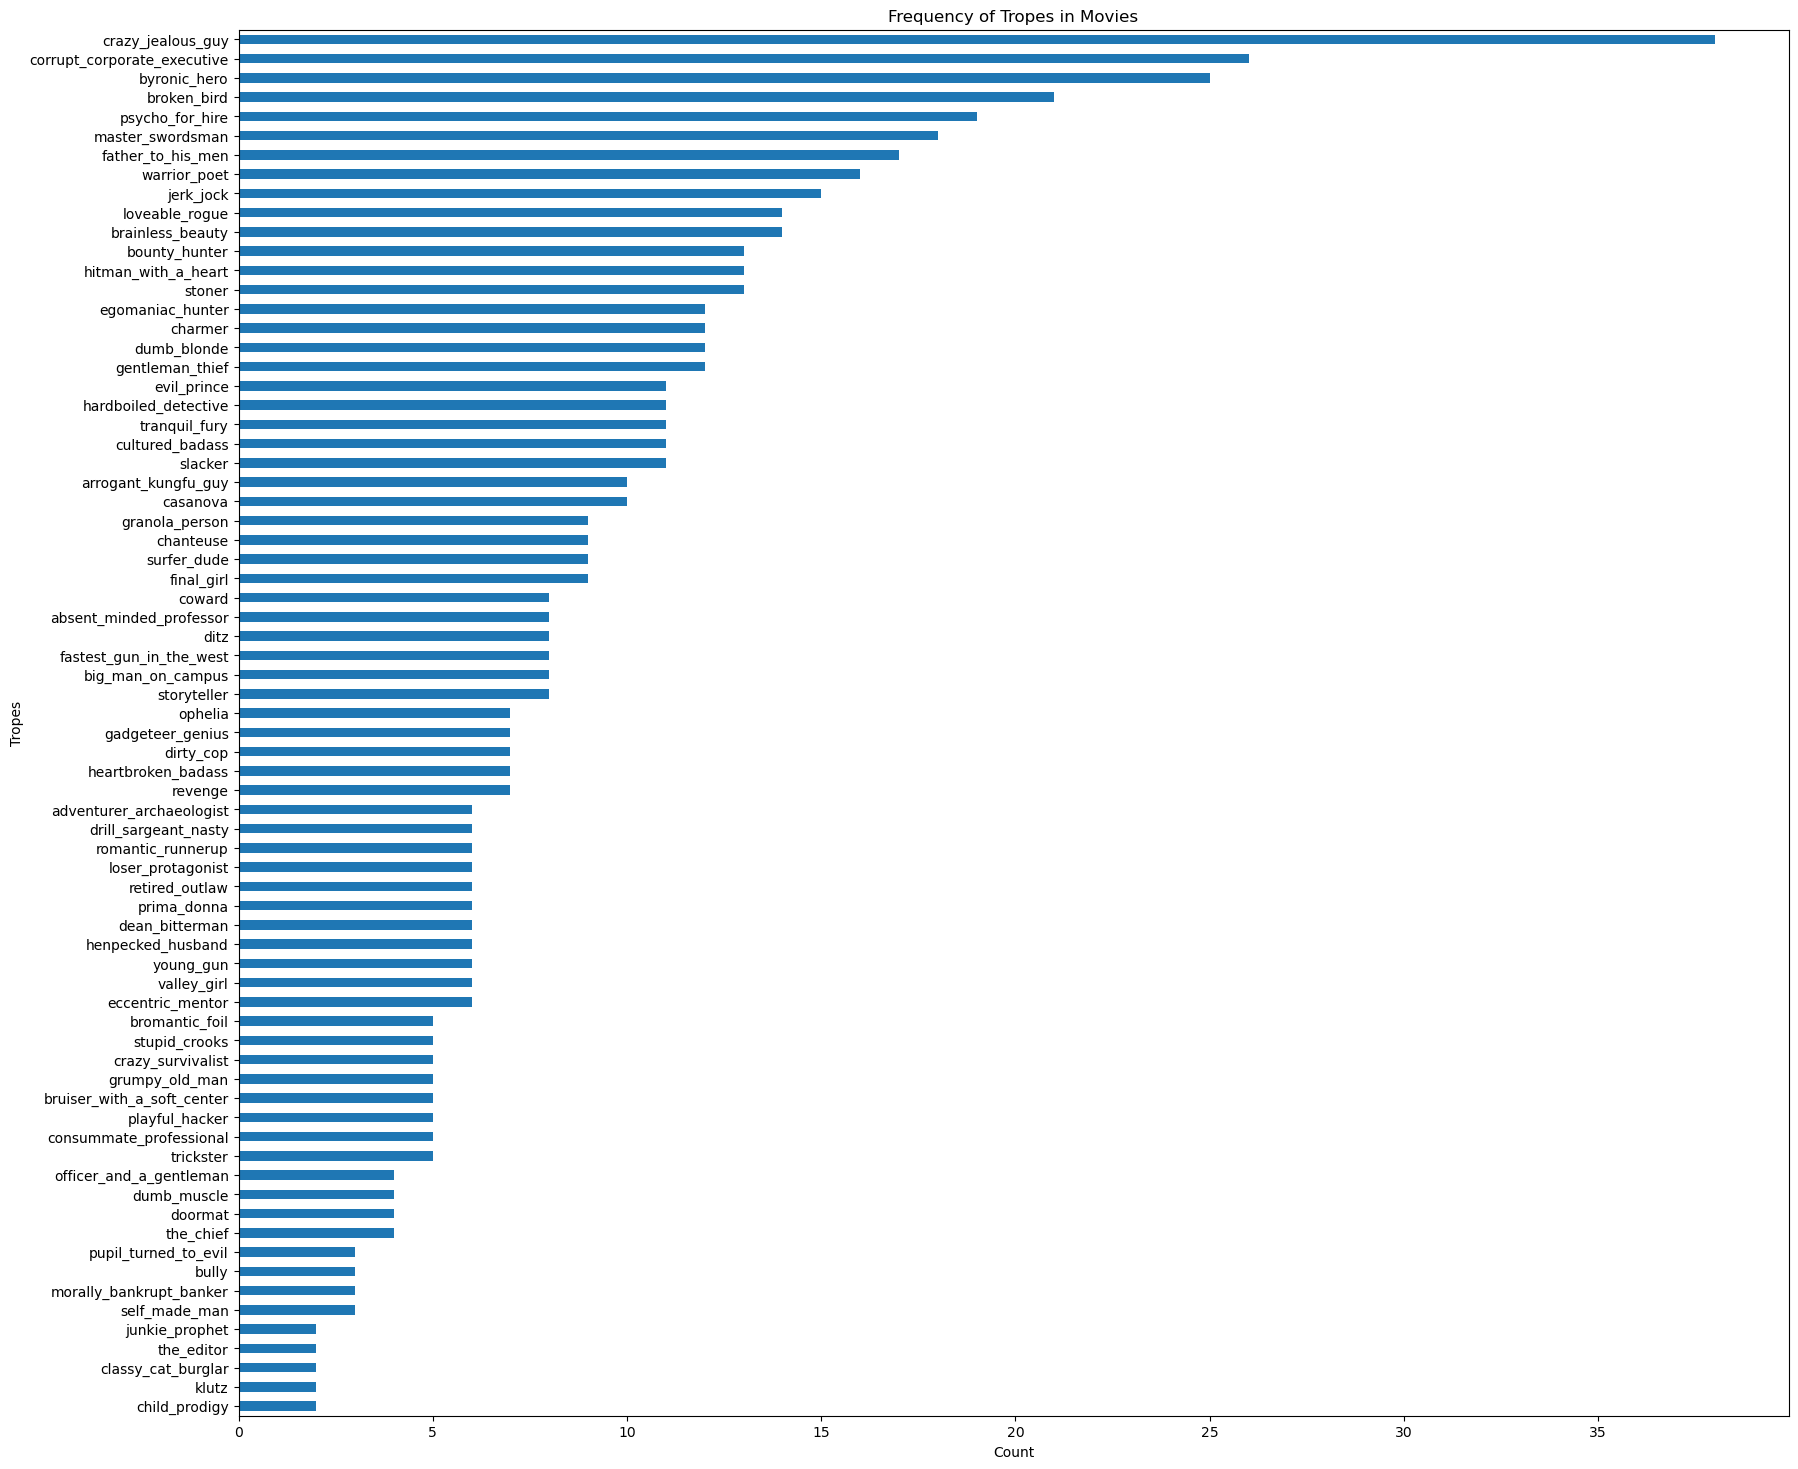

In [33]:
trope_counts = all_df['trope'].value_counts()

# Creating a horizontal bar plot for the tropes
plt.figure(figsize=(20, 18))
trope_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Tropes')
plt.title('Frequency of Tropes in Movies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()